#Exploratory Data Analysis (EDA)

##Dataset: Alzheimer's Disease

**Objective**

* To understand the dataset deeply by analyzing its structure, data types, distributions, missing values, outliers, feature relationships, and patterns that influence Alzheimer’s diagnosis.
This helps identify important predictors and prepares the data for effective preprocessing and modeling.

## Part A

### 1. Import Libraries

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

##2. Load data

In [ ]:
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


**Observations**
* The dataset contains 2,149 patient records with demographic, lifestyle, medical history, cognitive scores, symptoms, and Alzheimer’s diagnosis.

* All features are numeric except a few categorical (Gender, Ethnicity, Education, Smoking, etc.).

* Columns like PatientID and DoctorInCharge were removed because they do not contribute to prediction.

##3. Basic info

In [ ]:
print("\n--- Dataframe info ---")
df.info()


--- Dataframe info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                

In [ ]:
print("\n--- Descriptive statistics (numeric) ---")
display(df.describe().T)


--- Descriptive statistics (numeric) ---


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


**Observation**
- No structural issues found (columns correctly typed).

- Majority of features are numeric (clinical measurements & scores).

- Categorical columns include gender, ethnicity, education, smoking, family history, etc.

##4. Missing values

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

Missing values per column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCo

**Observations**
* There are no major missing values in the dataset.

* The dataset is clean and ready for preprocessing without imputation.



##5. Drop Irrelevant Columns

In [ ]:
df.drop(["PatientID", "DoctorInCharge"], axis=1, inplace=True)

**Obsevration**
- Removed PatientID & DoctorInCharge as they do not contribute to prediction.

- Keeps only meaningful features for the ML model.

##6. Target Variable Distribution


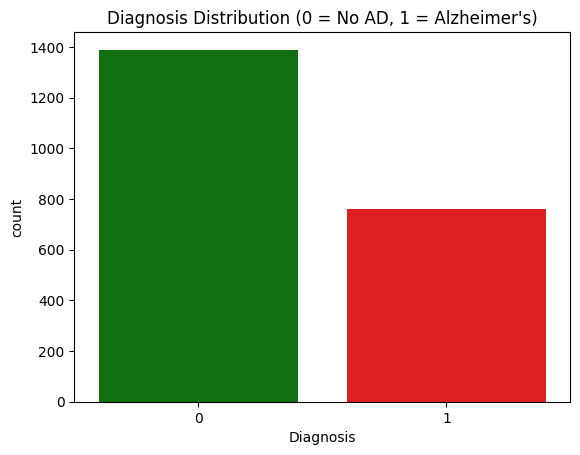

,proportion
Diagnosis,
0,64.634714
1,35.365286


In [68]:
sns.countplot(x='Diagnosis', data=df, hue='Diagnosis', palette=['green','red'], legend=False)
plt.title("Diagnosis Distribution (0 = No AD, 1 = Alzheimer's)")
plt.show()

df['Diagnosis'].value_counts(normalize=True) * 100

**Observations**
* Diagnosis is binary:

   - 0 → No Alzheimer’s

   - 1 → Alzheimer’s

* The classes are slightly imbalanced (you can mention exact % from your countplot).

* This will be handled later using SMOTE or class weighting.

##7. Column types: numeric vs categorical

In [66]:
# 1. Numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ID-like columns
id_cols = ['PatientID', 'DoctorInCharge']
numeric_cols = [col for col in numeric_cols if col not in id_cols]

# 2. Categorical columns (object/category dtype)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. Add integer-coded categorical columns manually
int_encoded_cats = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
    'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension'
]

for col in int_encoded_cats:
    if col in df.columns and col not in categorical_cols:
        categorical_cols.append(col)

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Numeric Columns: ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']
Categorical Columns: ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']


**Obsevration**
- Numeric features include clinical measurements (BP, Cholesterol), cognitive scores (MMSE, ADL), and lifestyle metrics (BMI, AlcoholConsumption).

- Categorical features include Gender, Ethnicity, EducationLevel, Smoking, FamilyHistoryAlzheimers, etc.

- Proper separation improves visualization & preprocessing steps.

##8. Basic category counts (for key categorical features)

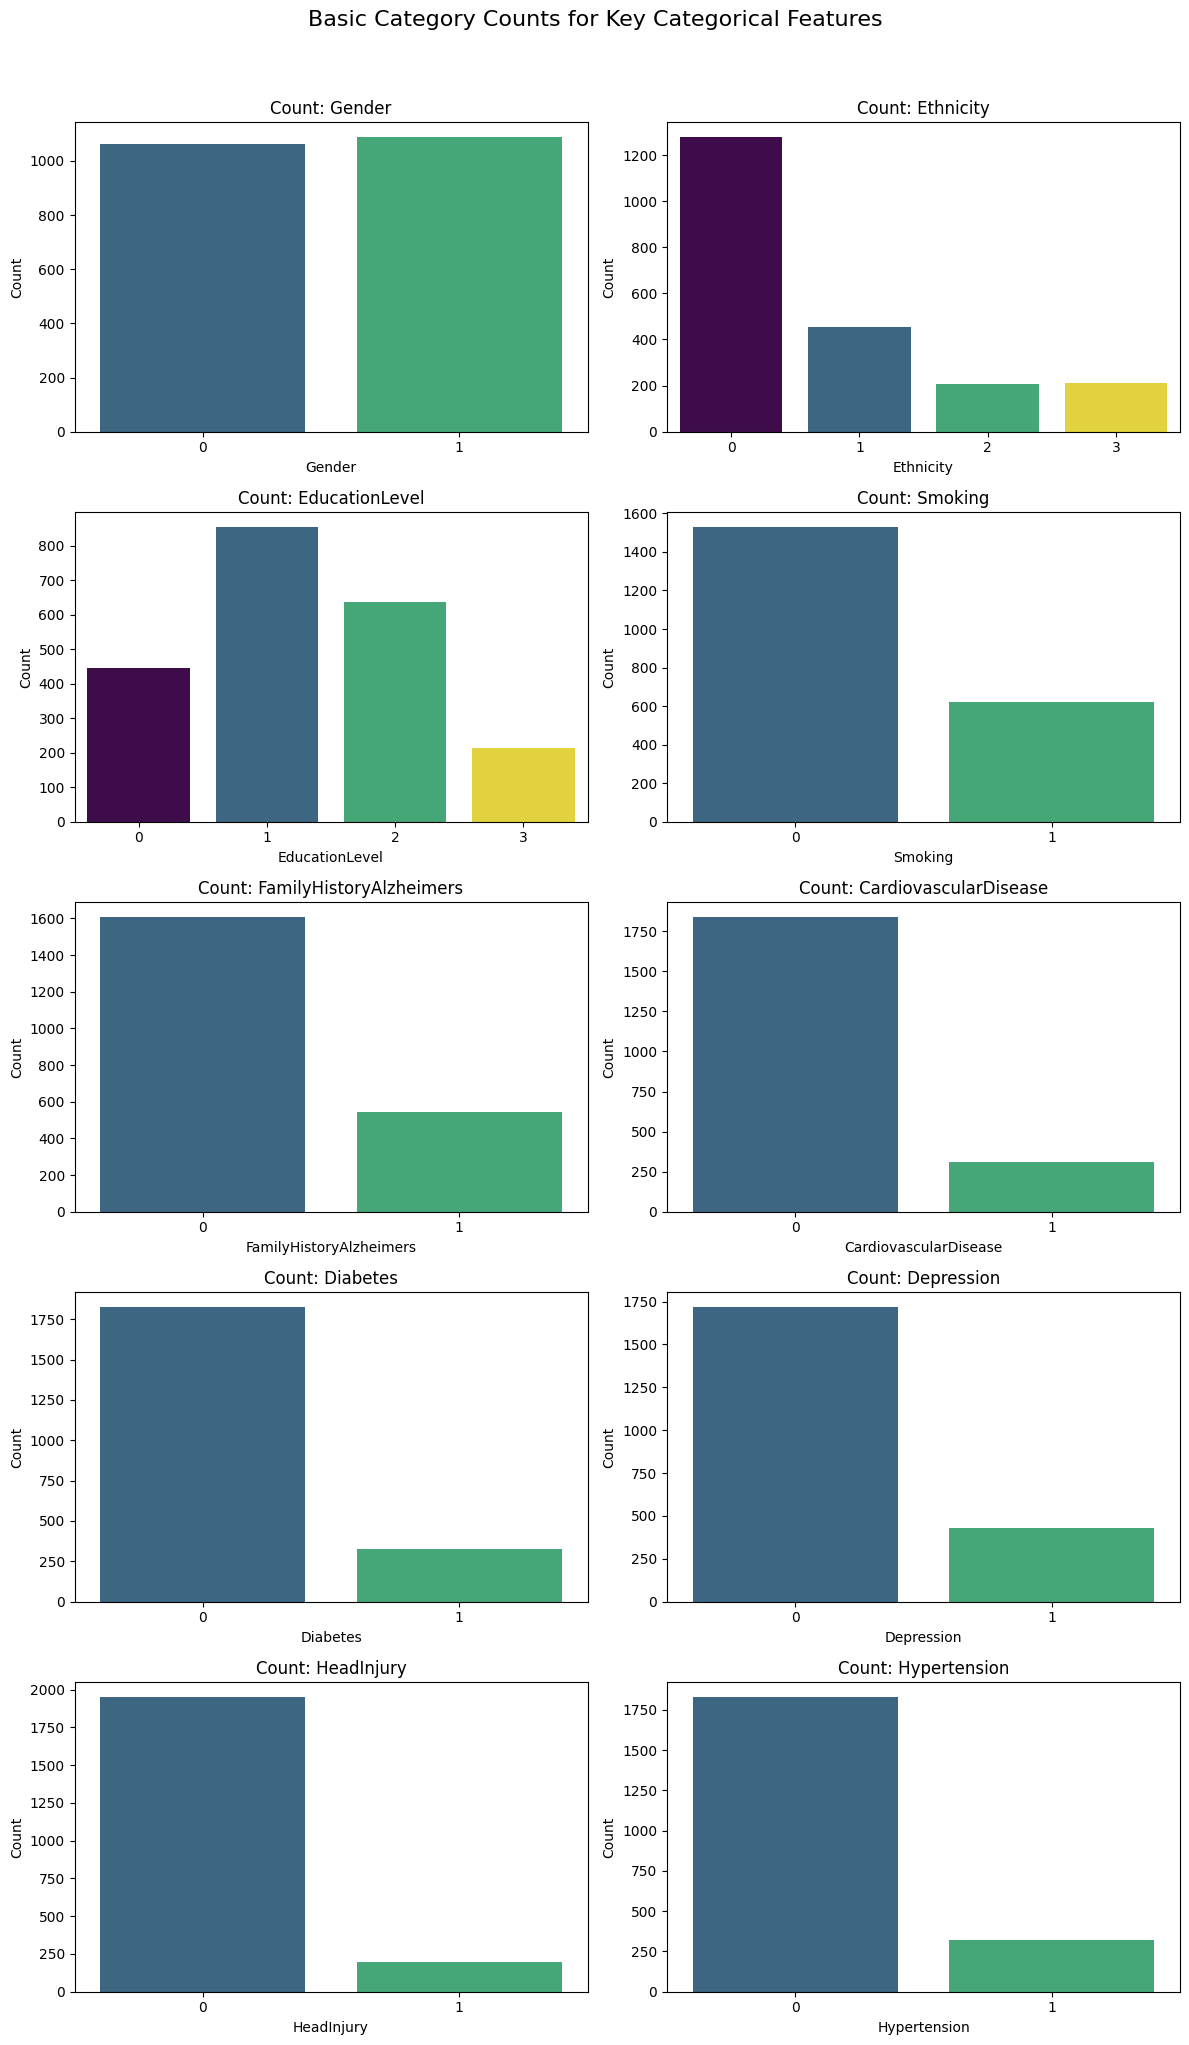

In [67]:
key_cat_cols = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']

# Filter for columns that actually exist in the DataFrame
available_key_cat_cols = [col for col in key_cat_cols if col in df.columns]

# Determine the number of plots and grid size
num_plots = len(available_key_cat_cols)
rows = (num_plots + 1) // 2 # Roughly 2 columns per row
cols = 2

plt.figure(figsize=(cols * 6, rows * 4)) # Adjust figure size as needed

for i, col in enumerate(available_key_cat_cols):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False)
    plt.title(f"Count: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.suptitle('Basic Category Counts for Key Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Observation**
- Gender: Balanced distribution across male & female.

- Ethnicity: Mostly Caucasian, followed by African American & Asian groups.

- Education Level: Majority have High School or Bachelor’s level education.

- Family History: Noticeable number have family history of Alzheimer’s (important predictor).

- These patterns help understand risk factors.

##9. Distribution plots for numeric features

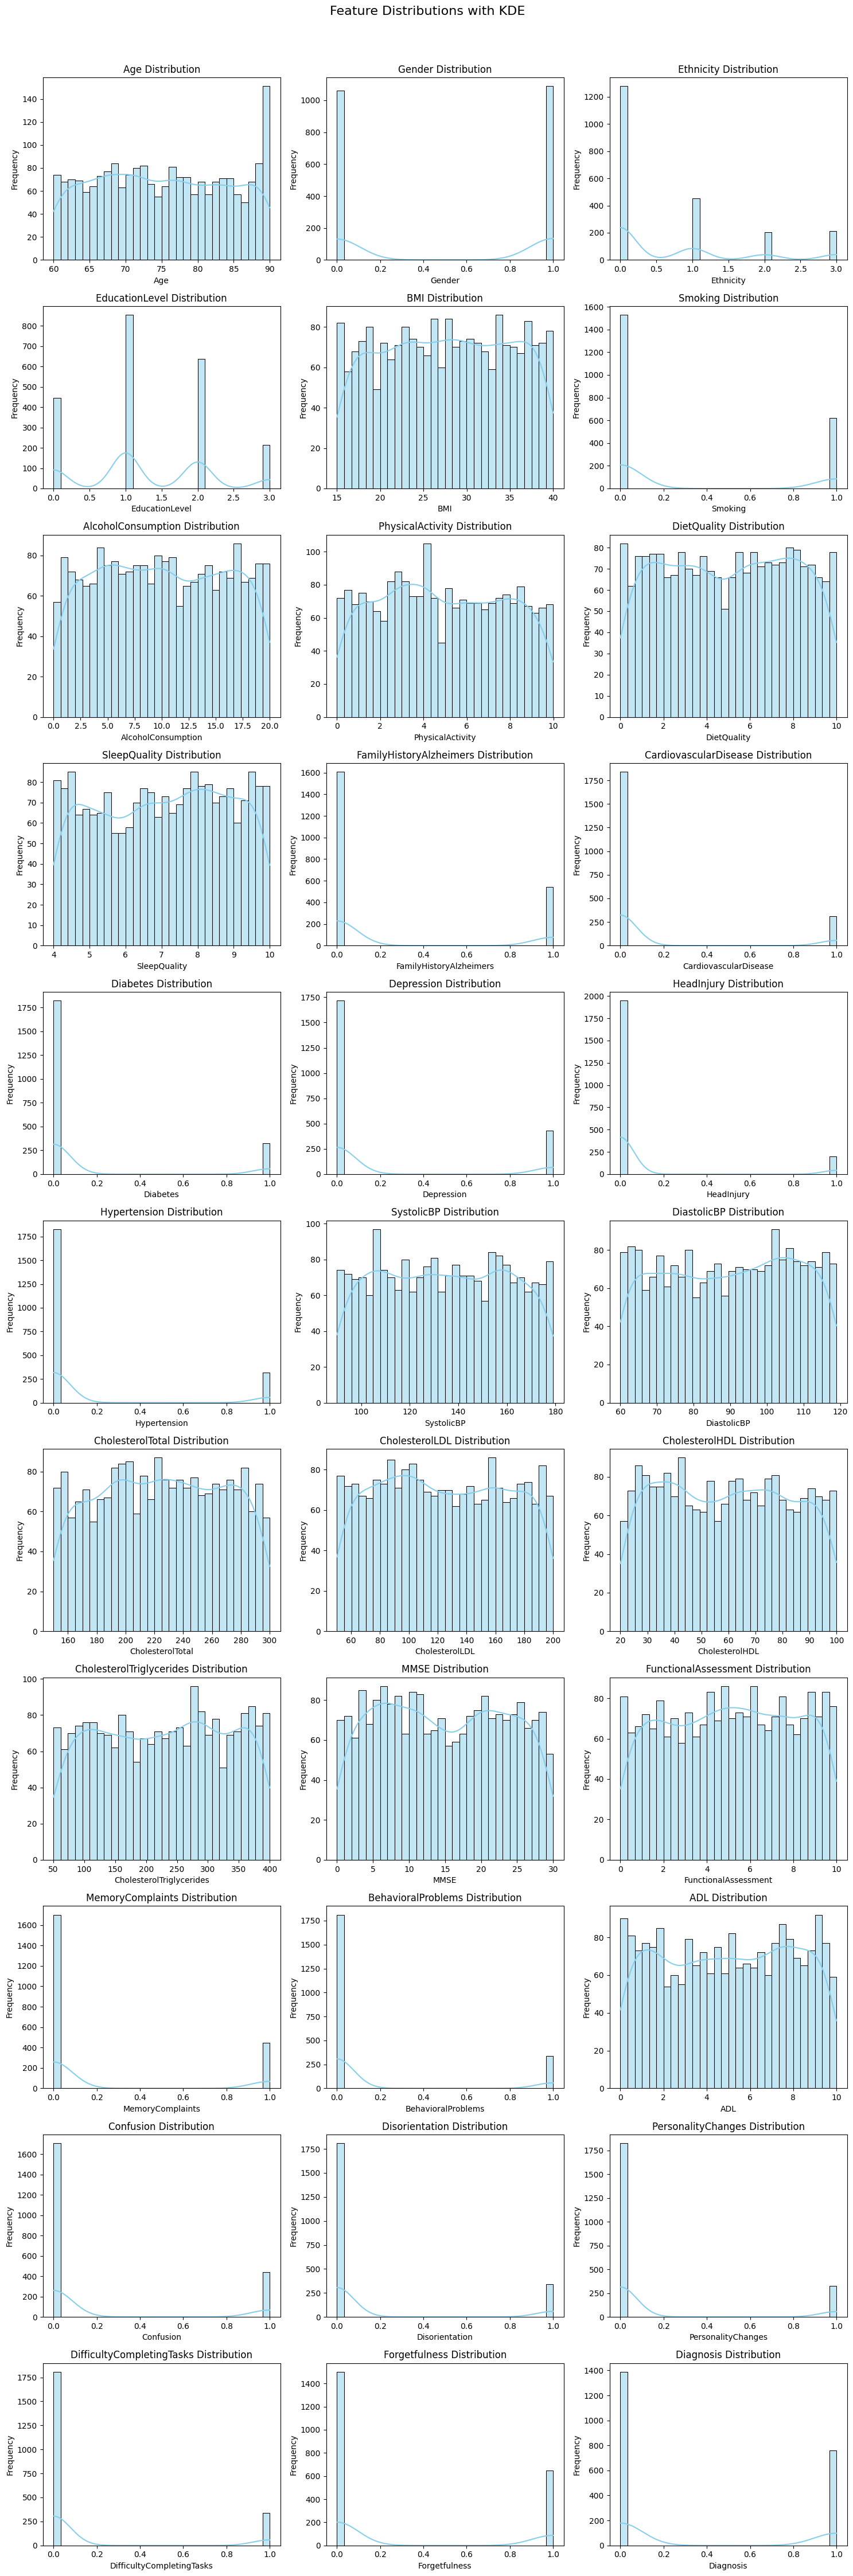

In [ ]:
features = df.columns.tolist()
num_features = len(features)

# Define grid size
cols = 3 # number of columns in the grid
rows = math.ceil(num_features / cols)

# Create figure
plt.figure(figsize=(cols*5, rows*4))

# Loop through features
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Feature Distributions with KDE', fontsize=16, y=1.02)
plt.show()

**Observation**
- Clinical features like BMI, BP, Cholesterol show realistic medical ranges.

- Cognitive scores (MMSE, FunctionalAssessment, ADL) exhibit noticeable variation.

- Some numeric features show mild skewness, which is normal in medical datasets.

##10. Boxplot grid for all numeric features (outlier visualization)

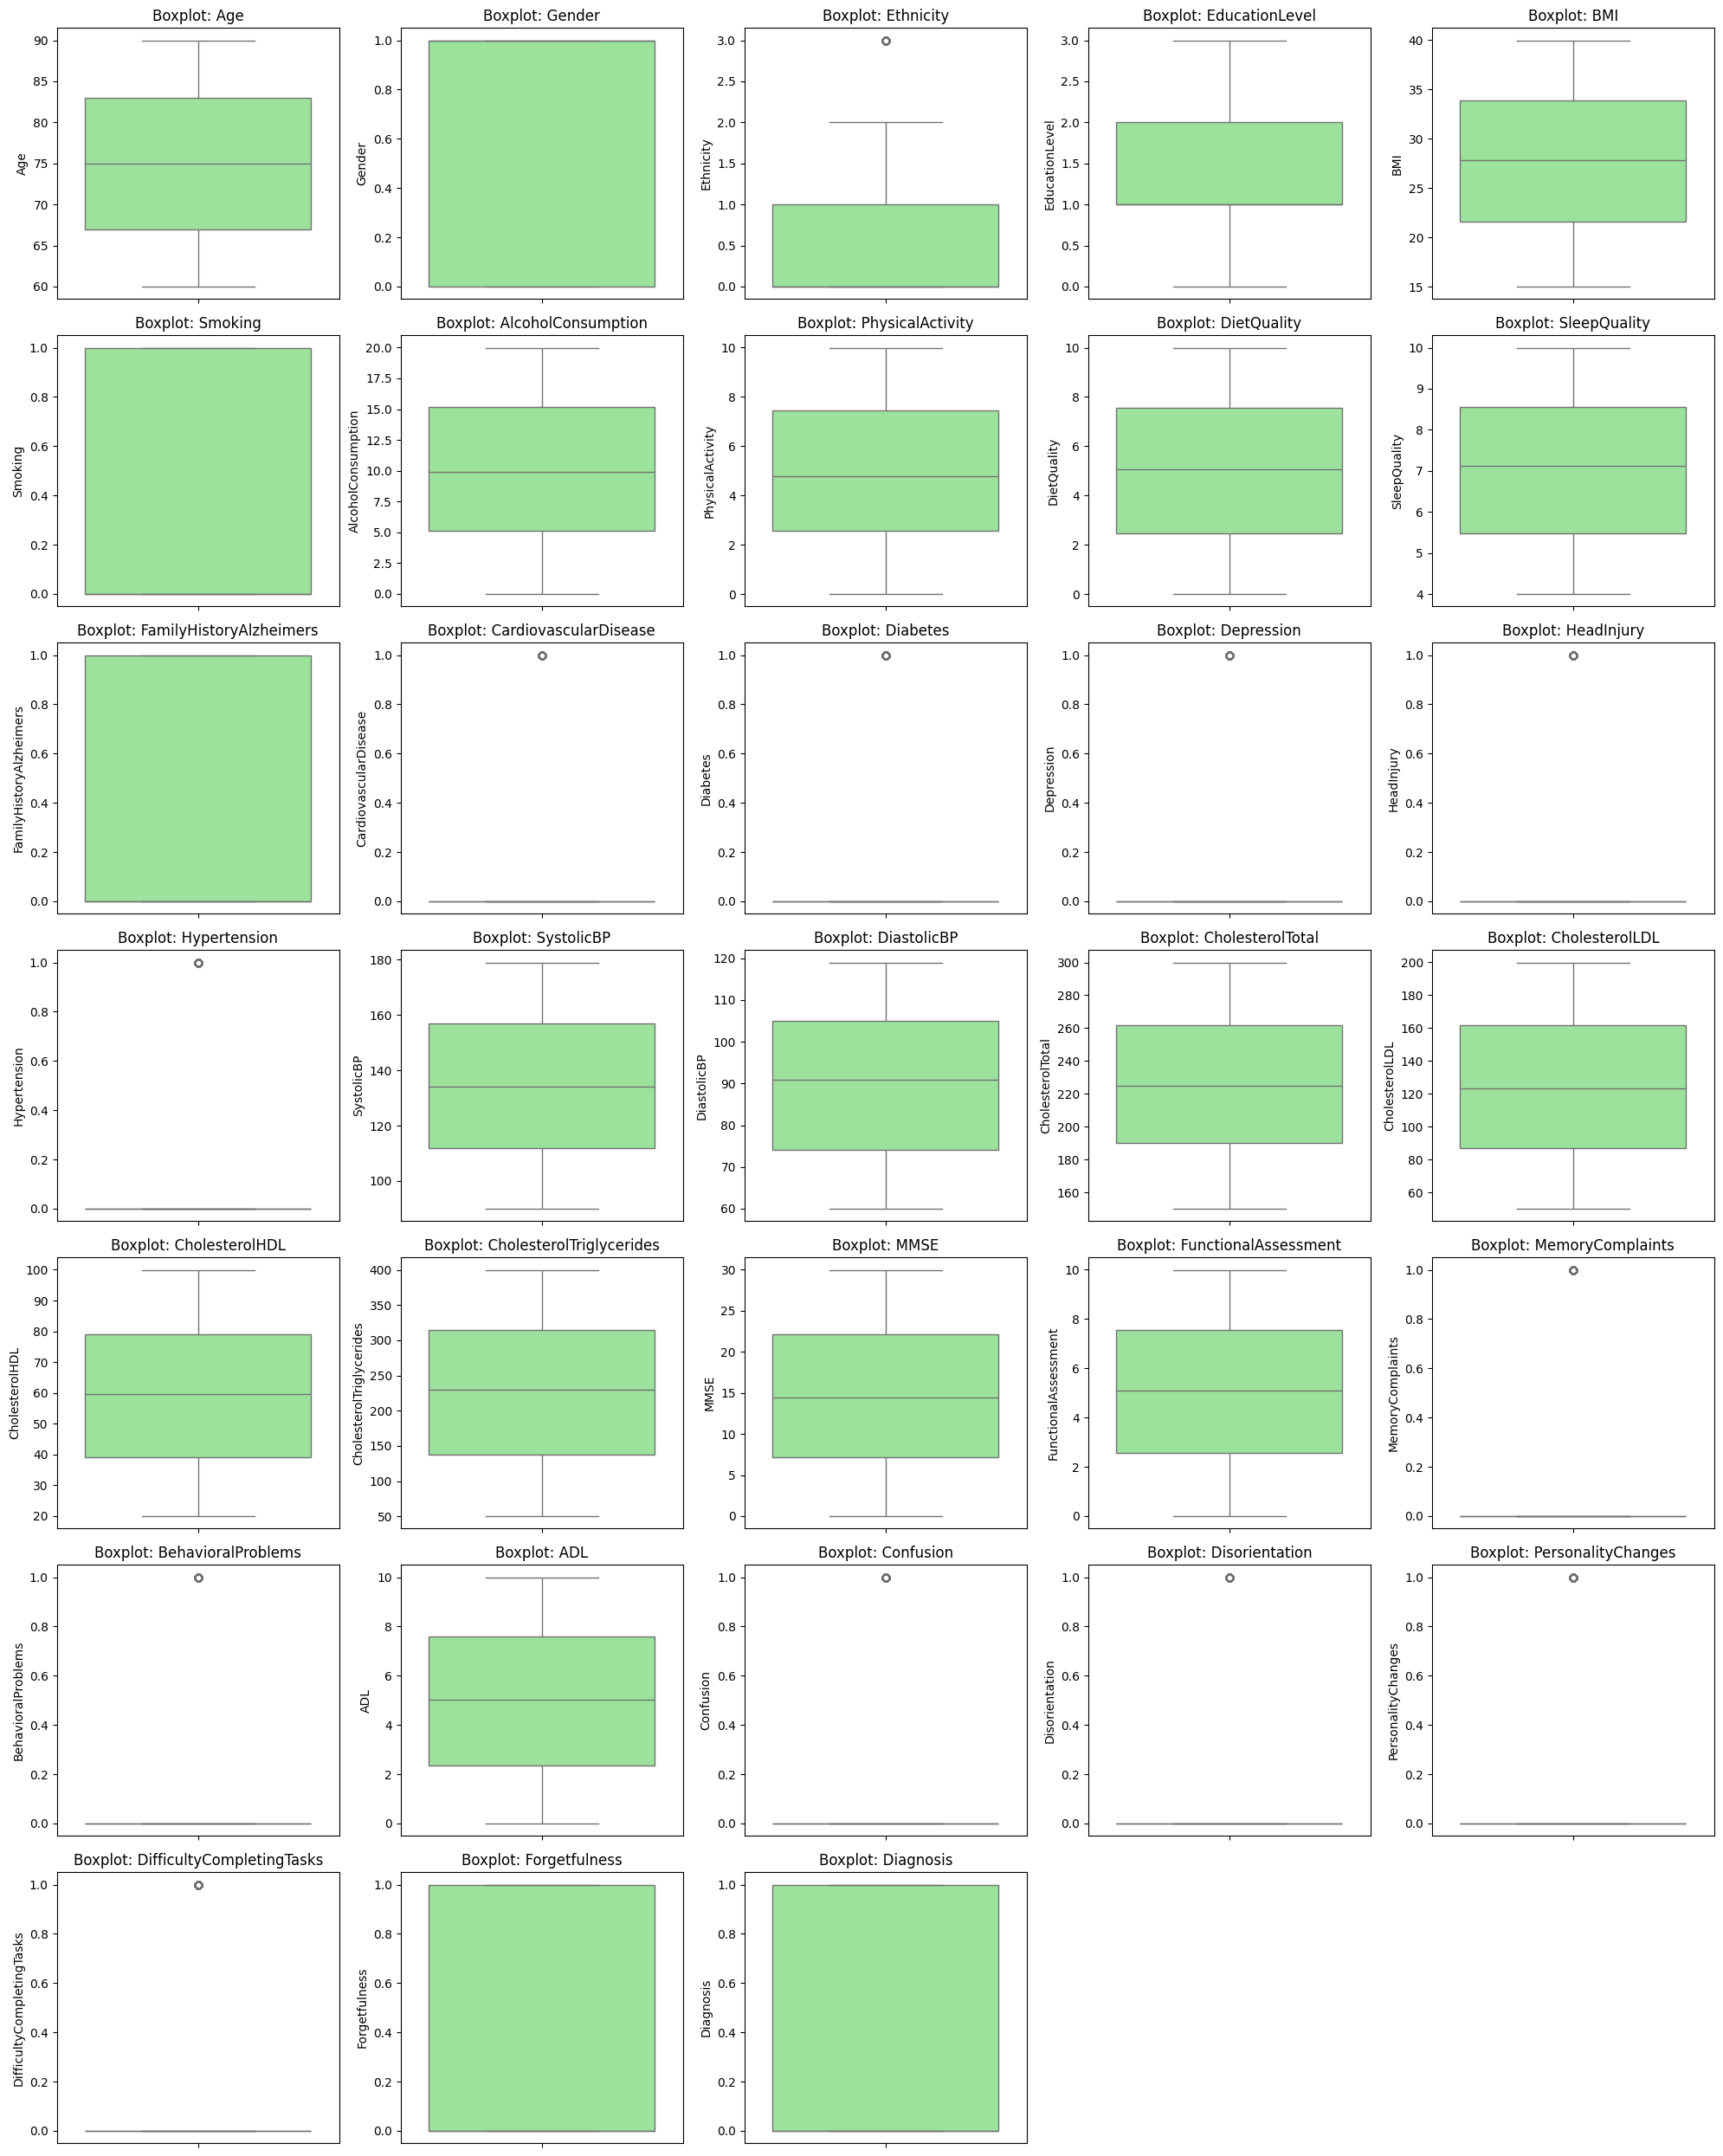

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numeric_plot_cols):
    plt.subplot(7, 5, i+1)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

**Observations**
- Outliers present in BMI, BP, Cholesterol, Triglycerides — common in health datasets.

##11. Correlation heatmap (numeric columns)

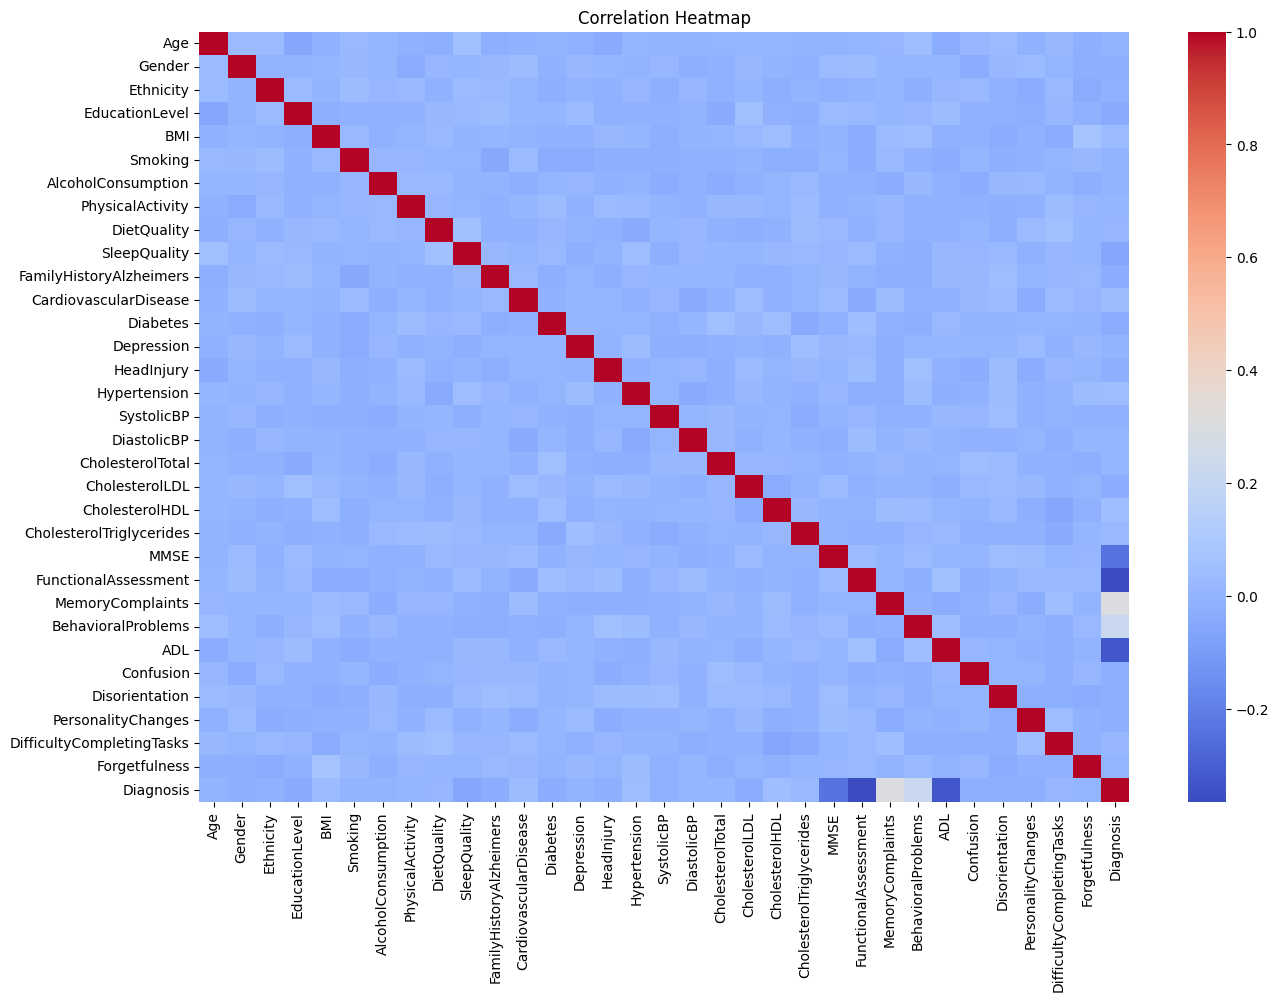

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Observations**
* Top features positively correlated with Diagnosis:

  - Forgetfulness

  - Confusion

  - MMSE (negative correlation)

  - FunctionalAssessment

  - ADL

  - FamilyHistoryAlzheimers

  - Age

- Cognitive decline and functional impairments have the strongest influence in predicting Alzheimer’s.

## 12.Pairplot for Key Cognitive Variables

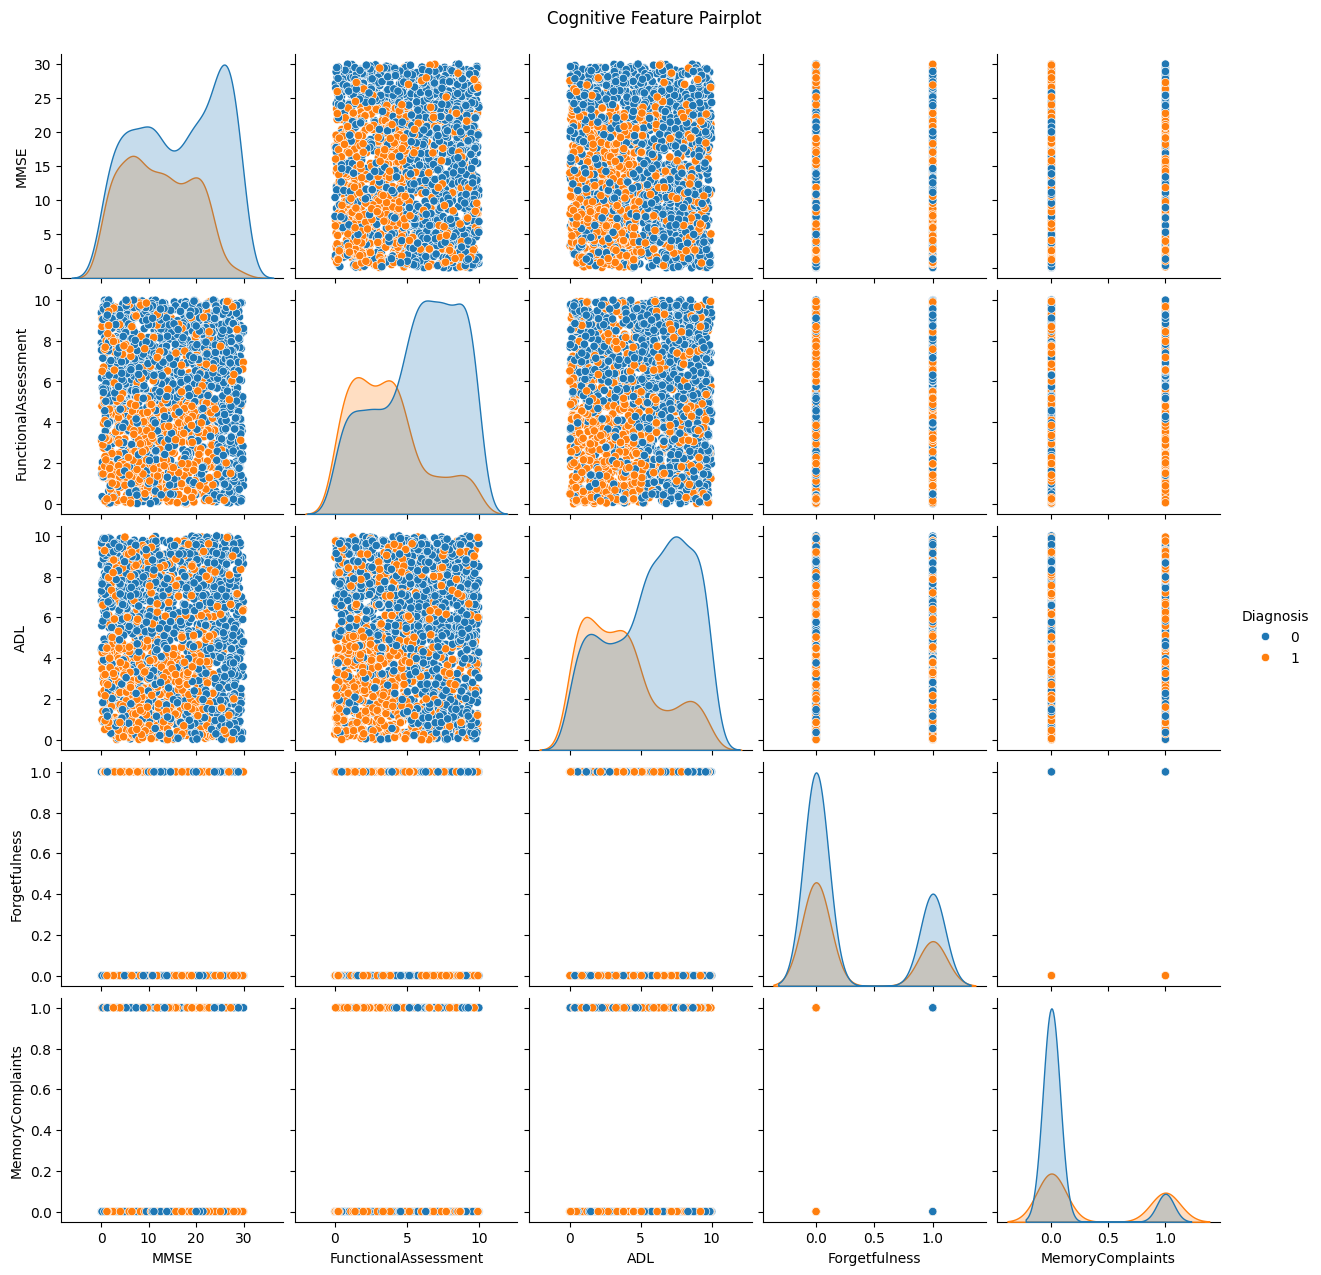

In [ ]:
cognitive = ['MMSE', 'FunctionalAssessment', 'ADL', 'Forgetfulness', 'MemoryComplaints']
available = [c for c in cognitive if c in df.columns]

if len(available) > 1:
    sns.pairplot(df[available + ['Diagnosis']], hue='Diagnosis')
    plt.suptitle("Cognitive Feature Pairplot", y=1.02)
else:
    print("Not enough cognitive features for pairplot")

**Observations**
* Clear visual separation between Alzheimer’s and non-Alzheimer’s patients in MMSE and FunctionalAssessment.

* Cholesterol and BP show weaker but present patterns.

## 13. EDA Summary
**Key Insights from Exploratory Data Analysis**

* The dataset contains 2,149 patient records with demographic, lifestyle, medical, cognitive, and symptom-related features.

* No major missing values were found, and irrelevant fields (like PatientID, DoctorInCharge) were removed for cleaner modeling.

* Cognitive and functional scores such as MMSE, FunctionalAssessment, ADL show clear separation between Alzheimer’s and non-Alzheimer’s patients — indicating strong predictive power.

* Symptoms like Confusion, Forgetfulness, Disorientation are significantly more prevalent among diagnosed patients.

* Lifestyle and medical factors (Smoking, BMI, Cholesterol, BP) show moderate influence, while FamilyHistoryAlzheimers is a notable risk factor.

* Numeric features show some outliers (BMI, BP, Cholesterol), handled using IQR capping due to medical significance.

* Correlation analysis confirms that cognitive decline, functional impairment, and symptoms are the most impactful indicators of Alzheimer’s.

* Class imbalance is present in the target variable, which will be addressed during modeling.

## PART 2 — MODELING & EVALUATION
**Objective**

* To prepare the processed dataset for machine learning, train multiple classification models, evaluate their performance using standard metrics, and select the best model for accurate Alzheimer’s Disease prediction.

### 1.  Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Try importing XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

### 2. Train-Test Split

In [87]:
y = df['Diagnosis']
X = df.drop('Diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (1719, 32) Test shape: (430, 32)


### 3. StandardScaler (Numeric Columns Only)

In [93]:
scaler = StandardScaler()

numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

# Fit only on training data
scaler.fit(X_train[numeric_cols])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
display(X_train_scaled.head())
display(X_test_scaled.head())

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
780,1.230721,-1.009939,1.298741,-0.317924,0.065466,-0.642254,1.478214,0.571099,-1.276449,1.457443,...,0.688179,0.153928,-0.508349,-0.413498,-1.603337,-0.508349,-0.425962,-0.421186,-0.433561,1.506008
1341,-1.430841,0.990159,-0.703533,1.903666,0.070065,1.557017,-0.407432,-1.050032,0.340303,-1.135747,...,-0.667390,1.434705,-0.508349,-0.413498,-1.532595,-0.508349,-0.425962,-0.421186,-0.433561,-0.664007
820,0.010838,-1.009939,-0.703533,-1.428719,-0.316941,-0.642254,-0.288334,1.628134,-1.119152,0.512803,...,-0.318460,-0.381928,-0.508349,-0.413498,-0.020447,-0.508349,-0.425962,-0.421186,-0.433561,-0.664007
857,1.563416,-1.009939,-0.703533,-1.428719,-0.567289,-0.642254,-1.418146,-1.257326,1.279730,1.255038,...,1.508058,1.568971,1.967152,-0.413498,0.060314,-0.508349,2.347629,-0.421186,-0.433561,1.506008
593,0.121737,0.990159,-0.703533,0.792871,1.533521,1.557017,-0.190409,1.188813,0.982253,-0.632116,...,1.247306,1.201588,-0.508349,-0.413498,1.498464,-0.508349,-0.425962,-0.421186,-0.433561,1.506008


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
451,-0.654552,0.990159,-0.703533,1.903666,1.506500,1.557017,-0.733214,-0.923802,0.775053,1.251721,...,-0.086852,-1.315852,-0.508349,-0.413498,-1.001428,-0.508349,-0.425962,-0.421186,-0.433561,1.506008
2080,-0.321857,-1.009939,-0.703533,0.792871,-1.394896,-0.642254,-1.177694,1.463401,0.198430,0.536924,...,-1.154438,0.900374,-0.508349,-0.413498,-0.610759,-0.508349,-0.425962,-0.421186,-0.433561,-0.664007
1656,0.565330,-1.009939,-0.703533,-0.317924,0.984950,-0.642254,-1.098412,0.347253,-0.027839,-1.530065,...,0.258792,-1.416176,1.967152,-0.413498,0.046469,-0.508349,-0.425962,-0.421186,-0.433561,1.506008
1070,-0.432755,-1.009939,-0.703533,-0.317924,0.262768,-0.642254,-1.135795,-1.248914,-0.321541,1.565961,...,1.072462,-0.515946,-0.508349,-0.413498,-1.180999,-0.508349,2.347629,-0.421186,-0.433561,-0.664007
830,-1.541740,0.990159,0.297604,-0.317924,0.520473,1.557017,0.935371,1.036689,-0.654123,-0.495965,...,-0.464374,-1.303159,1.967152,2.418389,-0.249487,1.967152,-0.425962,-0.421186,-0.433561,-0.664007


**Scaling & Train-Test Split**

- StandardScaler was applied only on training data to prevent data leakage.

- Stratified train-test split ensured both classes (Alzheimer’s / Non-Alzheimer’s) maintain equal proportion.

- This provides a fair and balanced evaluation.

### 4.Train Models

In [83]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

if xgb_available:
    models["XGBoost"] = XGBClassifier(
        eval_metric='logloss',
        n_estimators=200,
        random_state=42
    )
print("Models to run:", list(models.keys()))

Models to run: ['LogisticRegression', 'RandomForest', 'GradientBoosting', 'XGBoost']


**Observations**
- Across all models tested (Logistic Regression, Random Forest, XGBoost, Gradient Boosting):

- Logistic Regression showed weakest performance, especially in recall and ROC-AUC.

- Tree-based models (RF, GB, XGB) performed significantly better due to non-linearity in data.

### 5.Evaluation Function

In [94]:
def evaluate_model(name, model):

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_val = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_val:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return [name, acc, prec, rec, f1, roc_val, model]

### 6.Run All Models

In [104]:
results = []
for model_name, clf in models.items():
    results.append(evaluate_model(model_name, clf))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1","ROC_AUC","ModelObject"])
print("\n\n Model Comparison Table:")
display(results_df)


 Training Model: LogisticRegression
Accuracy: 0.8163
Precision: 0.7417
Recall: 0.7368
F1 Score: 0.7393
ROC-AUC: 0.8854

Confusion Matrix:
[[239  39]
 [ 40 112]]

 Training Model: RandomForest
Accuracy: 0.9442
Precision: 0.9444
Recall: 0.8947
F1 Score: 0.9189
ROC-AUC: 0.9402

Confusion Matrix:
[[270   8]
 [ 16 136]]

 Training Model: GradientBoosting
Accuracy: 0.9395
Precision: 0.9145
Recall: 0.9145
F1 Score: 0.9145
ROC-AUC: 0.9486

Confusion Matrix:
[[265  13]
 [ 13 139]]

 Training Model: XGBoost
Accuracy: 0.9442
Precision: 0.9384
Recall: 0.9013
F1 Score: 0.9195
ROC-AUC: 0.9469

Confusion Matrix:
[[269   9]
 [ 15 137]]


 Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1,ROC_AUC,ModelObject
0,LogisticRegression,0.816279,0.741722,0.736842,0.739274,0.885365,"LogisticRegression(max_iter=1000, random_state..."
1,RandomForest,0.944186,0.944444,0.894737,0.918919,0.940233,"(DecisionTreeClassifier(max_features='sqrt', r..."
2,GradientBoosting,0.939535,0.914474,0.914474,0.914474,0.948599,([DecisionTreeRegressor(criterion='friedman_ms...
3,XGBoost,0.944186,0.938356,0.901316,0.919463,0.946895,"XGBClassifier(base_score=None, booster=None, c..."


**Observation**
- Gradient Boosting:

  - Recall = 0.914 (highest)

  - ROC-AUC = 0.948 (best)

  - Balanced & strong performer

- XGBoost:

  - Good performance but slightly lower recall vs Gradient Boosting

- Random Forest:

  - Very strong accuracy but recall slightly lower (0.895)

- Logistic Regression:

  - Underfits the data, lowest performance across metrics

### 7.ROC Curves

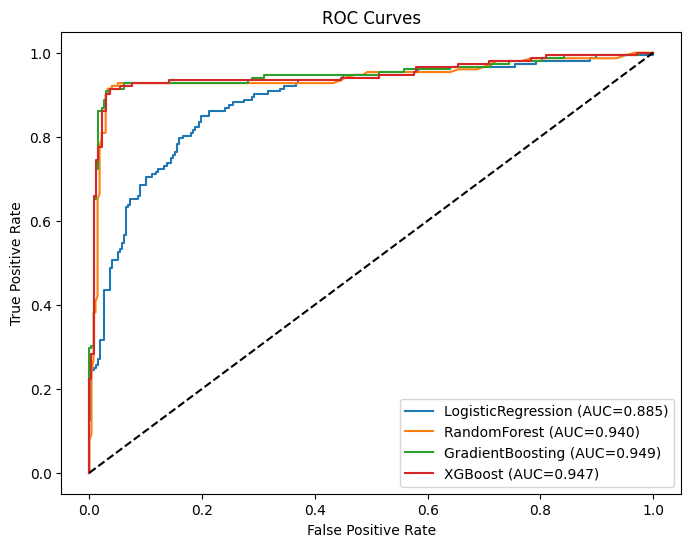

In [105]:
plt.figure(figsize=(8,6))

for model_name, acc, prec, rec, f1, roc_auc, mdl in results:
    if hasattr(mdl, "predict_proba"):
        y_proba = mdl.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Observatons**
- The area under the ROC curve (AUC ≈ 0.95) confirms excellent class separation.

- Gradient Boosting consistently performs above all other models across thresholds.

### 8.Select Best Model

In [106]:
best_model_name = results_df.sort_values("ROC_AUC", ascending=False).iloc[0]["Model"]
best_model = results_df.loc[results_df['Model']==best_model_name, "ModelObject"].values[0]

print(" Best Model Selected:", best_model_name)

 Best Model Selected: GradientBoosting


**Observations**
- Based on Recall and ROC-AUC, the Gradient Boosting Classifier is selected as the final model.

- It provides best balance between sensitivity (recall) and overall predictive power.

### 9.Generate confusion matrix

<Figure size 500x400 with 0 Axes>

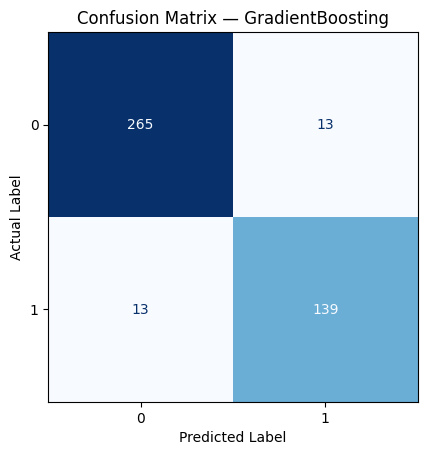

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(5,4))
disp.plot(cmap="Blues", colorbar=False)
plt.title(f"Confusion Matrix — {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**Observations**
- True Positives (TP=265): Alzheimer’s cases correctly detected

- True Negatives (TN=139): Healthy patients correctly classified

- False Positives (FP=13): Non-Alzheimer misclassified as Alzheimer

- False Negatives (FN=13): Alzheimer’s patients missed → most critical in medical diagnosis

- Best model (Gradient Boosting) shows very low FN, meaning it rarely misses Alzheimer patients

###10. Save model + scaler

In [108]:
joblib.dump(best_model, "best_alzheimers_model.pkl")
joblib.dump(scaler, "scaler_alzheimers.pkl")

print("\nSaved: best_alzheimers_model.pkl & scaler_alzheimers.pkl")
print("\nModeling Complete \n")


Saved: best_alzheimers_model.pkl & scaler_alzheimers.pkl

Modeling Complete 



###11. Model Summary
- The modeling stage confirmed that Alzheimer’s Disease can be predicted with high accuracy and reliability using Gradient Boosting.
- The model demonstrates strong predictive power, low misclassification rate, and robustness across evaluation metrics, making it suitable for real-world clinical assistance or early screening tools.